In [44]:
# This notebook will read in reflectivity data from a NEXRAD Level III file 
# and display it.

In [45]:
import metpy.calc as mpcalc

In [46]:
import metpy.constants as mpconst

%matplotlib inline

In [47]:
from metpy.calc import reduce_point_density
from metpy.cbook import get_test_data
from metpy.io import metar, Level3File
from metpy.plots import add_metpy_logo, current_weather, sky_cover, StationPlot, add_timestamp, colortables

In [48]:
from siphon.catalog import TDSCatalog

In [49]:
#Product codes
# NCR   Composite Refl (37)
#
# N0B - Super Res Base Refl  (153)
# N0C - Super Res CC   (161)
# N0S - Storm Rel Mean Vel (56)
# NST - SCIT (58)
# N0X - ZDR (15)
# N0G - Base Radial Vel (1 54)

#url='https://thredds.ucar.edu/thredds/catalog/nexrad/level3/N0B/TLX/20220504/catalog.html'

In [50]:
#print(url)

In [51]:
#url_xml = url.replace(".html", ".xml")

In [52]:
#cat = TDSCatalog(url_xml)

In [53]:
#print(cat.datasets)

In [54]:
#print('Total files: ' + str(len(cat.datasets)))

In [55]:
#ds = cat.datasets[0]
#ds.access_urls

In [56]:
from datetime import datetime


In [57]:
import xarray as xr

In [58]:
from metpy.units import units

In [59]:
 
from siphon.radarserver import RadarServer

In [60]:
#cat = TDSCatalog('https://thredds.ucar.edu/thredds/radarServer/catalog.xml')

In [61]:
#list(cat.catalog_refs)

In [62]:
#cat.catalog_refs['NEXRAD Level III Radar from IDD'].href

In [63]:
#rs= RadarServer(cat.catalog_refs['NEXRAD Level III Radar from IDD'].href)

In [64]:
from datetime import datetime,timedelta

In [65]:
#query = rs.query()
now=datetime.utcnow()
#query.stations('TLX').time_range(now - timedelta(hours=1), now).variables('N0B')

In [66]:
#query_cat = rs.get_catalog(query)

In [67]:
#sorted(query_cat.datasets)

In [68]:
#query.stations('TLX','LTX').time_range(now - timedelta(hours=1), now).variables('N0B', 'N0C')
#query.stations('TLX').time_range(now - timedelta(hours=1), now).variables('N0B')

In [69]:
#query_cat = rs.get_catalog(query)

#sorted(query_cat.datasets)

In [70]:
#product_codes = ['NCR', 'N0B','N0C']
# NCR   Composite Refl (37)
# N0B - Super Res Base Refl  (153)
# N0C - Super Res CC   (161)
# N0S - Storm Rel Mean Vel (56)
# NST - SCIT (58)
# N0X - ZDR (15)
# N0G - Base Radial Vel (1 54)

product_codes = ['N0B']
#query_catalogs=dict()
#for product_code in product_codes:
#    query.stations('TLX').time_range(now - timedelta(hours=1), now).variables(product_code)
#    query_cat = rs.get_catalog(query)
#    query_catalogs[product_code]=query_cat
    


In [71]:
#query_catalogs

In [72]:
#sorted(query_catalogs['N0B'].datasets)

In [73]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from siphon.cdmr import Dataset

%matplotlib inline
#

In [74]:
#data_dir='/export/home/orpg9/wxdata/level_III/TLX'
data_dir='/home/pmccrone/data/NEXRAD/levelIII/KTLX'

#Level3_TLX_N0B_20220505_1529.nids  Level3_TLX_N0B_20220505_1541.nids
#Level3_TLX_N0B_20220505_1535.nids

#Level3_TLX_N0G_20220505_1529.nids  Level3_TLX_N0G_20220505_1541.nids
#Level3_TLX_N0G_20220505_1535.nids

file=data_dir+'/Level3_TLX_N0B_20220505_1529.nids'
print('file is'+file)

file is/home/pmccrone/data/NEXRAD/levelIII/KTLX/Level3_TLX_N0B_20220505_1529.nids


In [76]:
f = Level3File(file)

# Pull the data out of the file object
datadict = f.sym_block[0][0]

# Turn into an array using the scale specified by the file
#data = f.map_data(datadict['data'])


#data = query_cat.datasets[0].remote_access()
#print(list(data.variables))

In [100]:
field_name = 'BaseReflectivityDR'
#field_name = 'CorrelationCoefficient'

#range_data = data.variables['gate'][:]
range_data = np.linspace(0, f.max_range, data.shape[-1] + 1)

#azimuth_data = data.variables['azimuth'][:]
azimuth_data = np.array(datadict['start_az'] + [datadict['end_az'][-1]])

#radar_data = data.variables[field_name][:]
radar_data  = f.map_data(datadict['data'])


#radar_data_scale=(127.0/253.0)*radar_data
radar_data_scale=(2.0)*radar_data

radar_data_scale=radar_data_scale+32.0
#radar_data
#print('max= '+str((radar_data[0])))

In [101]:
x = range_data * np.sin(np.deg2rad(azimuth_data))[:,None]

y = range_data * np.cos(np.deg2rad(azimuth_data))[:,None]

In [102]:
radar_data = np.ma.array(radar_data, mask = np.isnan(radar_data))

In [103]:
#proj = cartopy.crs.LambertConformal(central_longitude=data.RadarLongitude,
#                                  central_latitude=data.RadarLatitude)


#Latitude: 35.3334° (decimal), Longitude: -97.2778° (decimal), 
RadarLatitude = 35.3334

RadarLongitude= -97.2778


proj = ccrs.LambertConformal(central_longitude=RadarLongitude,
                                  central_latitude=RadarLatitude)

#proj = ccrs.PlateCarree()



In [107]:
#print(data.time_coverage_start)
mytime='2022-05-05 15:29:00'
#data_time = datetime.strptime(mytime, '%Y-%m-%dT%H:%M:%SZ')

print(mytime)


2022-05-05 15:29:00


AttributeError: 'str' object has no attribute 'strftime'

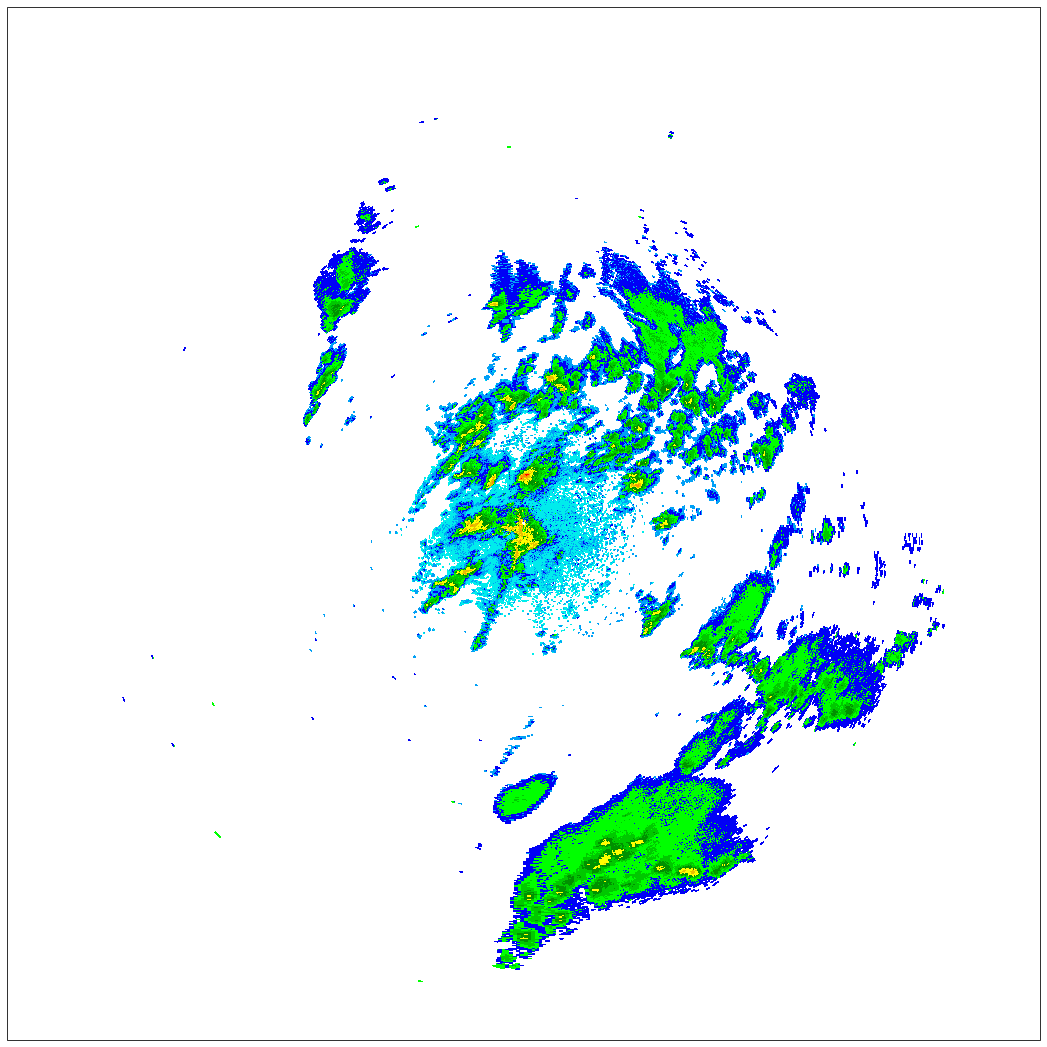

In [120]:
from metpy.plots import ctables, add_timestamp, add_metpy_logo
#import cartopy.crs as ccrs

import cartopy.feature as cfeature

state_borders = cartopy.feature.NaturalEarthFeature( category='cultural', 
                                                    name='admin_1_states_provinces_lakes',
                                                   scale='50m', facecolor='none')

#import cartopy.io.shapereader as shpreader
#reader = shpreader.Reader('/home/pmccrone/data/GIS/shapefile/countyl010g.shp')
#counties = list(reader.geometries())

#-COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())
#-COUNTIES = cfeature.ShapelyFeature(counties, ccrs.LambertConformal())
#COUNTIES1 = cartopy.feature.ShapelyFeature(counties, ccrs.LambertConformal())

fig = plt.figure(figsize=(19,19))
ax = plt.subplot(1, 1, 1, projection=proj)

#norm, cmap = ctables.registry.get_with_steps('NWSStormClearReflectivity', 16, 16)# 50
norm, cmap = ctables.registry.get_with_steps('NWSReflectivity', 16, 16)# 50

#norm, cmap = ctables.registry.get_with_steps('NWSReflectivityExpanded', 16, 16)# ok
#norm, cmap = ctables.registry.get_with_steps('precipitation', 16, 16)# 50
#norm, cmap = ctables.registry.get_with_steps('NWS8bitVel', 16, 16)#yuk

mesh = ax.pcolormesh(x, y, radar_data_scale, norm=norm, cmap=cmap, zorder=0)

add_timestamp(ax, time=data_time)

    
#add_timestamp(ax, f.metadata['prod_time'], y=0.02, high_contrast=True)

add_metpy_logo(fig, y=30)
ax.add_feature(state_borders, edgecolor='black', linewidth=2, zorder=2)

#ax.add_feature(COUNTIES1, color='black')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS, color='blue')
ax.gridlines(draw_labels=True)

from metpy.plots import USCOUNTIES

ax.add_feature(USCOUNTIES.with_scale('500k'), edgecolor='pink')

distance_in_degrees = 2.0


ax.set_extent([RadarLongitude - distance_in_degrees,
              RadarLongitude + distance_in_degrees,
              RadarLatitude - distance_in_degrees,
              RadarLatitude + distance_in_degrees ])

#ax.set_extent([data.RadarLongitude - distance_in_degrees,
#              data.RadarLongitude + distance_in_degrees,
#              data.RadarLatitude - distance_in_degrees,
#              data.RadarLatitude + distance_in_degrees ])

##fig.colorbar(mesh, ax=ax)

##mdata = metar.parse_metar_file(get_test_data('metar_20190701_1200.txt', as_file_obj=False))
#mdata = data.dropna(how='any', subset=['wind_direction', 'wind_speed'])

##stationplot = StationPlot(ax, mdata['longitude'].values, mdata['latitude'].values,
##                          clip_on=True, transform=ccrs.PlateCarree(), fontsize=12)

##stationplot.plot_text((2, 0), mdata['station_id'].values)

#mesh = ax.pcolormesh(x, y, radar_data_scale, norm=norm, cmap=cmap, zorder=0)

